In [1]:
from mltools import mlstudy as mls
from mltools import mlproc as ml
from mltools import mdaio
import numpy as np
import time

In [2]:
# Generate sample data
M=32
samplerate=30000
duration=60*20
N=int(samplerate*duration)

X=100*np.random.normal(0,1,[M,N])**2
correlated_signal=100*np.random.normal(0,1,[N])**2
X[0,:]=X[0,:]*0.5+correlated_signal
X[1,:]=X[1,:]*0.5+correlated_signal
mdaio.writemda16i(X,'raw.mda')
X=0 #free memory

In [3]:
ml.execProcess('pyms.bandpass_filter',{'timeseries':'raw.mda'},{'timeseries_out':'filt.mda'},{'samplerate':30000,'freq_min':300,'freq_max':6000},{})
ml.execProcess('ms3.bandpass_filter',{'timeseries':'raw.mda'},{'timeseries_out':'filt_compare.mda'},{'samplerate':30000,'freq_min':300,'freq_max':6000},{})

RUNNING:::::: ml-run-process pyms.bandpass_filter --inputs timeseries:raw.mda --parameters freq_min:300 samplerate:30000 freq_max:6000 --mode=exec --outputs timeseries_out:filt.mda
[ Getting processor spec... ]
[ Checking inputs and substituting prvs ... ]
[ Checking outputs... ]
[ Creating temporary directory ... ]
[ Initializing process ... ]
[ Running ... ] /home/magland/main-venv/bin/python3 /home/magland/.mountainlab/packages/mountainsort/packages/pyms/preprocessing/preprocessing.py pyms.bandpass_filter --timeseries=/home/magland/.mountainlab/packages/mountainsort/packages/pyms/preprocessing/raw.mda --timeseries_out=/home/magland/.mountainlab/packages/mountainsort/packages/pyms/preprocessing/filt.mda --freq_min=300 --samplerate=30000 --freq_max=6000 --_tempdir=/tmp/mountainlab-tmp/tempdir__d4ELzd
Chunk size: 30000, Padding: 3000, Num chunks: 1200, Num processes: 8

Processed 204 of 1200 chunks...
Processed 604 of 1200 chunks...
Processed 807 of 1200 chunks...
Processed 1133 of 120

{'timeseries_out': 'filt_compare.mda'}

In [4]:
from view_timeseries import view_timeseries
A='raw.mda'
B='filt.mda'
C='filt_compare.mda'
trange=[samplerate*60*10,samplerate*(60*10+0.01)]
fig_size=[18,10]
view_timeseries(A,trange=trange,fig_size=fig_size)
view_timeseries(B,trange=trange,fig_size=fig_size)
view_timeseries(C,trange=trange,fig_size=fig_size)

<Figure size 1800x1000 with 1 Axes>

<Figure size 1800x1000 with 1 Axes>

<Figure size 1800x1000 with 1 Axes>

In [5]:
ml.execProcess('pyms.whiten',{'timeseries':'filt.mda'},{'timeseries_out':'pre.mda'},{},{})
ml.execProcess('ms3.whiten',{'timeseries':'filt_compare.mda'},{'timeseries_out':'pre_compare.mda'},{},{})

RUNNING:::::: ml-run-process pyms.whiten --inputs timeseries:filt.mda --parameters --mode=exec --outputs timeseries_out:pre.mda
[ Getting processor spec... ]
[ Checking inputs and substituting prvs ... ]
[ Checking outputs... ]
[ Creating temporary directory ... ]
[ Initializing process ... ]
[ Running ... ] /home/magland/main-venv/bin/python3 /home/magland/.mountainlab/packages/mountainsort/packages/pyms/preprocessing/preprocessing.py pyms.whiten --timeseries=/home/magland/.mountainlab/packages/mountainsort/packages/pyms/preprocessing/filt.mda --timeseries_out=/home/magland/.mountainlab/packages/mountainsort/packages/pyms/preprocessing/pre.mda --_tempdir=/tmp/mountainlab-tmp/tempdir__3JhDdu
Chunk size: 300000, Num chunks: 120, Num processes: 8

Processed 47 of 120 chunks...

Processed 93 of 120 chunks...

Elapsed time for processor pyms.whiten: 11.887 sec
[ Removing temporary directory ... ]
[ Done. ]
RUNNING:::::: ml-run-process ms3.whiten --inputs timeseries:filt_compare.mda --param

{'timeseries_out': 'pre_compare.mda'}

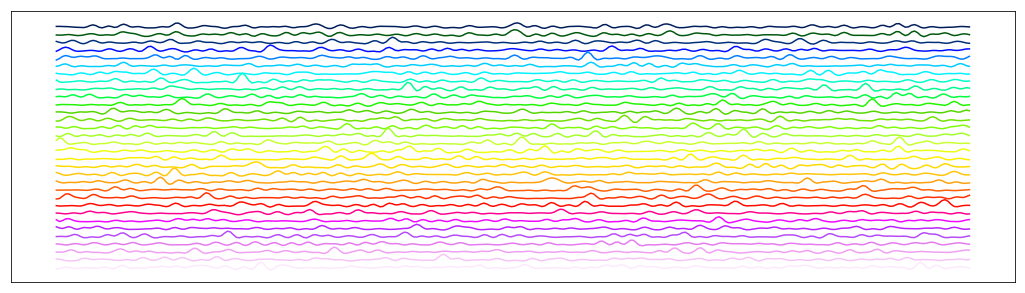

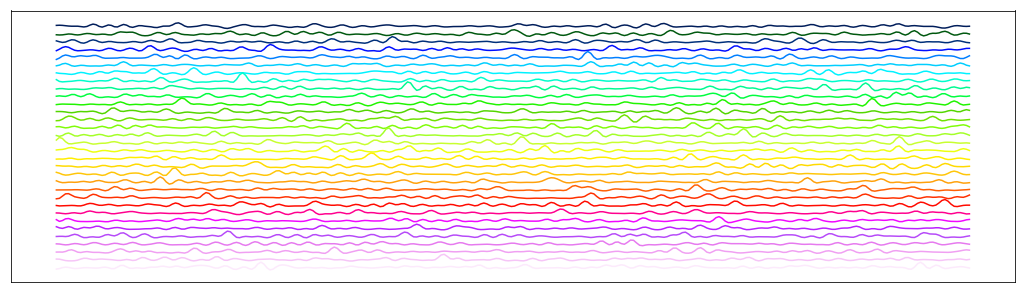

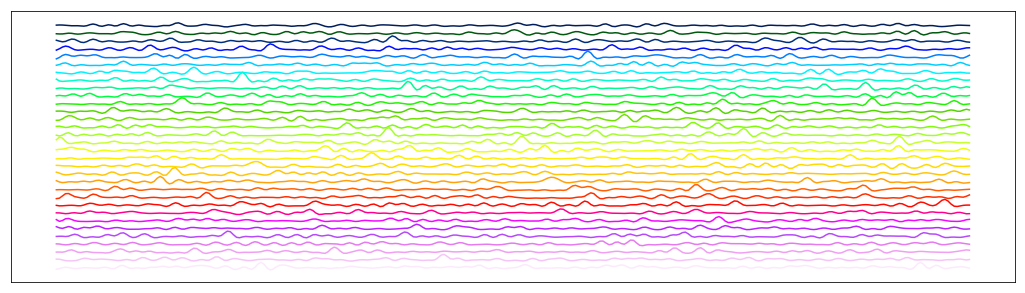

In [6]:
A='filt.mda'
B='pre.mda'
C='pre_compare.mda'
trange=[samplerate*60*10,samplerate*(60*10+0.01)]
fig_size=[18,5]
view_timeseries(A,trange=trange,fig_size=fig_size)
view_timeseries(B,trange=trange,fig_size=fig_size)
view_timeseries(C,trange=trange,fig_size=fig_size)